In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
# import xesmf as xe

In [3]:
# F45 global grid
# file_base = "ERP_D_Ld9.f45_f45_mg37.I2000Clm50FatesCruRsGs.cheyenne_intel.clm-FatesCold.pr1005-disp_on-erp-f45-nodenscount-int.clm2.h0.2000-01-01-00000.nc.base"
# file_rest = "ERP_D_Ld9.f45_f45_mg37.I2000Clm50FatesCruRsGs.cheyenne_intel.clm-FatesCold.pr1005-disp_on-erp-f45-nodenscount-int.clm2.h0.2000-01-01-00000.nc.rest"

# Amazon 5x5, ERP
# file_base = "ERP_D_Ld9.5x5_amazon.I2000Clm50FatesCruRsGs.cheyenne_intel.clm-FatesCold.pr1005-disp_on-erp-amz5x5-direct_noneigh-int.clm2.h0.2000-01-01-00000.nc.base"
# file_rest = "ERP_D_Ld9.5x5_amazon.I2000Clm50FatesCruRsGs.cheyenne_intel.clm-FatesCold.pr1005-disp_on-erp-amz5x5-direct_noneigh-int.clm2.h0.2000-01-01-00000.nc.rest"

# Amazon 5x5, PEM
file_base = "PEM_D_Ld9.5x5_amazon.I2000Clm50FatesCruRsGs.cheyenne_gnu.clm-FatesColdSeedDisp.pr1005-fatescoldseeddisp-pem-gaterefac-gnu.clm2.h0.2000-01-01-00000.nc"
file_rest = "PEM_D_Ld9.5x5_amazon.I2000Clm50FatesCruRsGs.cheyenne_gnu.clm-FatesColdSeedDisp.pr1005-fatescoldseeddisp-pem-gaterefac-gnu.clm2.h0.2000-01-01-00000.nc.modpes"

In [4]:
ds_base = xr.open_dataset(file_base)
ds_rest = xr.open_dataset(file_rest)

In [5]:
pft_idx = 0
seedin_rest = ds_rest.FATES_SEEDS_IN_GRIDCELL_PF.isel(fates_levpft=pft_idx)
seedin_base = ds_base.FATES_SEEDS_IN_GRIDCELL_PF.isel(fates_levpft=pft_idx)
seedin_rest_pftsum = ds_rest.FATES_SEEDS_IN_GRIDCELL_PF.sum(dim='fates_levpft')
seedin_base_pftsum = ds_base.FATES_SEEDS_IN_GRIDCELL_PF.sum(dim='fates_levpft')

In [126]:
np.floor(25/2)

12.0

In [146]:
def GCIndexAnnotate(ax,pe,type):
    xlat = np.tile(ds_base.lat.data, len(ds_base.lon.data))
    xlon = np.repeat(ds_base.lon.data,len(ds_base.lat.data))
    # print(len(xlon))
    # print(int(np.floor(len(xlon)/pe)))
    for i in range(pe):
        for j in range(i, len(xlon), pe):
            # print(i, j+1, xlon[j], xlat[j])
            if type == 'pes':
                ax.annotate(str(i),(xlon[j],xlat[j]))
            elif type == 'gidx':
                ax.annotate(str(j+1),(xlon[j],xlat[j]))                

## Rest - Base post restart

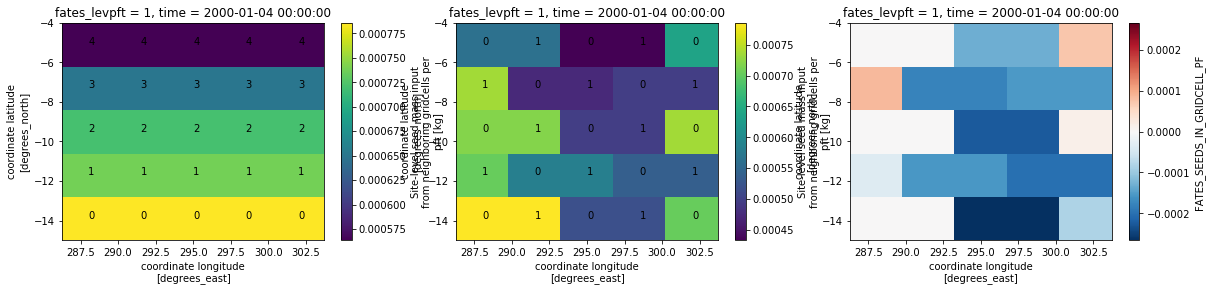

In [162]:
time_idx = 3
fig, axs = plt.subplots(ncols=3,figsize=(20,4))
seedin_base.isel(time=time_idx).plot(ax=axs[0])
seedin_rest.isel(time=time_idx).plot(ax=axs[1])
diff_seed = seedin_rest.isel(time=time_idx)-seedin_base.isel(time=time_idx)
diff_seed.plot(ax=axs[2])
GCIndexAnnotate(axs[0],5,'pes')
GCIndexAnnotate(axs[1],2,'pes')

## Base before and after restart

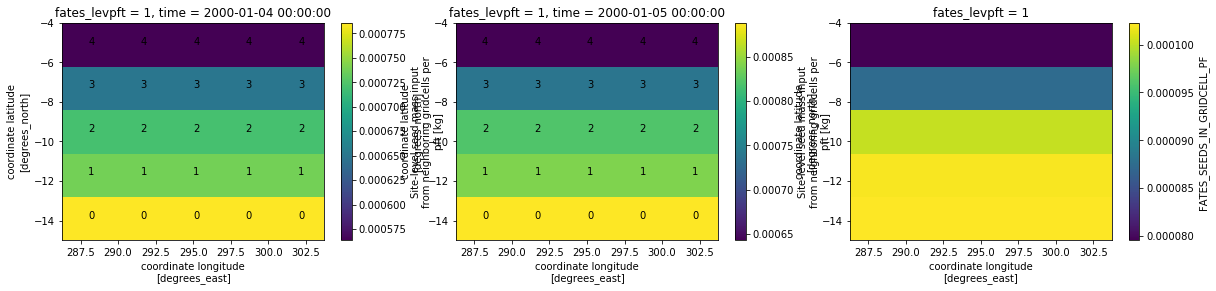

In [164]:
time_idx = 3
fig, axs = plt.subplots(ncols=3,figsize=(20,4))
seedin_base.isel(time=time_idx).plot(ax=axs[0])
seedin_base.isel(time=time_idx+1).plot(ax=axs[1])
diff_seed = seedin_base.isel(time=time_idx+1)-seedin_base.isel(time=time_idx)
diff_seed.plot(ax=axs[2])
GCIndexAnnotate(axs[0],5,'pes')
GCIndexAnnotate(axs[1],5,'pes')

## Rest before and after restart

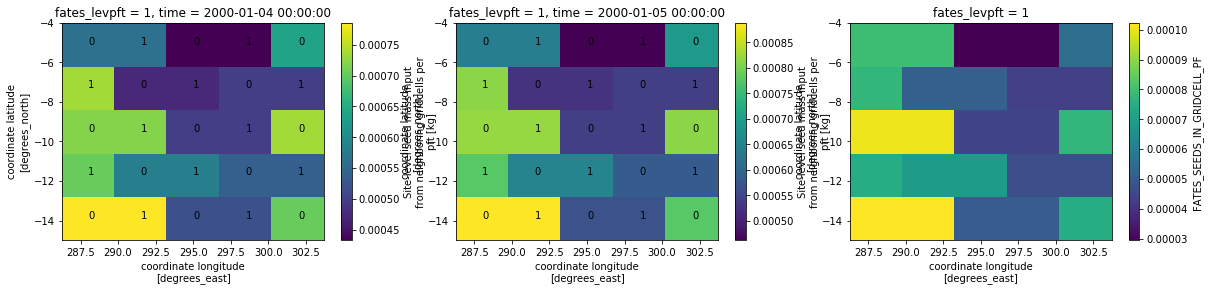

In [165]:
time_idx = 3
fig, axs = plt.subplots(ncols=3,figsize=(20,4))
seedin_rest.isel(time=time_idx).plot(ax=axs[0])
seedin_rest.isel(time=time_idx+1).plot(ax=axs[1])
diff_seed = seedin_rest.isel(time=time_idx+1)-seedin_rest.isel(time=time_idx)
diff_seed.plot(ax=axs[2])
GCIndexAnnotate(axs[0],2,'pes')
GCIndexAnnotate(axs[1],2,'pes')